# 👋🌍 Hello, world: Submit a Qiskit job to Rigetti

In this notebook, we'll review the basics of Azure Quantum by submitting a simple *job*, or quantum program, to [Rigetti](https://www.rigetti.com/). We will use [Q#](https://docs.microsoft.com/azure/quantum/user-guide/) to express the quantum job.

## Submit a simple job to Rigetti using Azure Quantum
Azure Quantum provides several ways to express quantum programs. In this example we are using Q#, but note that Qiskit is also supported. All code in this example will be written in Python and Q#.

Let's begin. When you see a code block, hover over it and click the triangle play-button to execute it. To avoid any compilation issues, this should be done in order from top to bottom.

### 1. Connect to the Azure Quantum workspace

To connect to the Azure Quantum service, call the `connect` function as seen below. This can take 30 seconds to run the first time, as the Q# environment is initializing.

In [13]:
import qsharp.azure
targets = qsharp.azure.connect(
   resourceId="/subscriptions/677fc922-91d0-4bf6-9b06-4274d319a0fa/resourceGroups/xiou/providers/Microsoft.Quantum/Workspaces/xiou-notebooks-demo",
   location="eastus2euap")

Connecting to Azure Quantum...

Authenticated using Microsoft.Azure.Quantum.Authentication.TokenFileCredential


Connected to Azure Quantum workspace xiou-notebooks-demo in location eastus2euap.


We can use the resulting object to see which _targets_ are available for submission.

In [2]:
import qsharp

print("This workspace's targets:")
for target in targets:
    print("-", target.id)

This workspace's targets:
- microsoft.simulator.fullstate
- microsoft.simulator.qirtest
- microsoft.simulator.resources-estimator
- ionq.qpu
- ionq.simulator
- quantinuum.hqs-lt-s1
- quantinuum.hqs-lt-s1-apival
- quantinuum.hqs-lt-s2
- quantinuum.hqs-lt-s2-apival
- quantinuum.hqs-lt-s1-sim
- quantinuum.hqs-lt-s2-sim
- quantinuum.hqs-lt
- rigetti.echo
- rigetti.sim.qvm
- rigetti.qpu.aspen-11
- rigetti.qpu.aspen-m-1


### ❕ Do you see `rigetti.sim.qvm` in your list of targets? If so, you're ready to keep going.

Don't see it? You may need to add Rigetti to your workspace to run this sample. Navigate to the **Providers** page in the portal and click **+Add** to add the Rigetti provider.

In [9]:
from azure.quantum.target.rigetti import RigettiTarget

# Set the target to Rigetti's QVM simulator. This will be used when we submit a job to Azure Quantum to determine which provider/target to send to.
qsharp.azure.target(RigettiTarget.QVM)

Loading package Microsoft.Quantum.Providers.Rigetti and dependencies...
Active target is now rigetti.sim.qvm


{'id': 'rigetti.sim.qvm', 'current_availability': {}, 'average_queue_time': 5}

## Rigetti: The quantum provider
Azure Quantum partners with third-party companies to deliver solutions to quantum jobs. These company offerings are called *providers*. Each provider can offer multiple *targets* with different capabilities. See the table below for Rigetti's targets.

| Target name | Target ID | Number of qubits | Description |
| --- | --- | --- | --- |
| Rigetti QVM (simulator) | `rigetti.sim.qvm` | 20 qubits | Rigetti's cloud-based, [open-source](https://github.com/quil-lang/qvm) "Quantum Virtual Machine" simulator. Free to use. |
| Aspen 11 (hardware) | `rigetti.qpu.aspen-11` | 40 qubits | Rigetti's "Aspen-11" universal, physical QPU. Read more at [Rigetti's website](https://qcs.rigetti.com/qpus). |
| Aspen M-1 (hardware) | `rigetti.qpu.aspen-m-1` | 80 qubits | Rigetti's "Aspen-M-1" universal, physical QPU. Read more at [Rigetti's website](https://qcs.rigetti.com/qpus). |

For this example, we will use `rigetti.sim.qvm`. To learn more about Rigetti's targets, check out [Rigetti's Azure Quantum documentation](https://docs.microsoft.com/azure/quantum/provider-rigetti).

### 2. Build the quantum program

Let's create a simple Q# program to run.

In [4]:
# We declare the function we will define in Q# as a callable so that Python recognizes the symbol.
GenerateRandomBit: any = None

In [10]:
%%qsharp
open Microsoft.Quantum.Measurement;
open Microsoft.Quantum.Arrays;
open Microsoft.Quantum.Convert;

operation GenerateRandomBit() : Result {
    use target = Qubit();

    // Apply an H-gate and measure.
    H(target);
    return M(target);
}

The program you built is a simple quantum random bit generator. With Rigetti's simulator, we will be able to estimate the probability of measuring a `1` or `0`.

### 3. Submit the quantum program to Rigetti

We will use the `execute` function to run the quantum program above on Rigetti's `rigetti.sim.qvm` target, designated by `RigettiTarget.QVM`. This may take a minute or so ⏳. Your job will be packaged and sent to Rigetti, where it will wait its turn to be run.

In [11]:
# We'll use 100 shots (simulated runs). Timeout is in seconds.
result = qsharp.azure.execute(GenerateRandomBit, shots=100, jobName="Generate one random bit", timeout=240)

Submitting GenerateRandomBit to target rigetti.sim.qvm...
Job successfully submitted.
   Job name: Generate one random bit
   Job ID: 87867da0-52c7-42f6-9fa2-12d48be4a760
Waiting up to 240 seconds for Azure Quantum job to complete...
[23:25:23] Current job status: Waiting
[23:25:28] Current job status: Waiting
[23:25:33] Current job status: Executing
[23:25:38] Current job status: Succeeded


The job ID can be used to retrieve the results later using the `output` and `status` functions or by viewing it under the **Job management** section of the portal.

### 4. Visualize job results 
You can also view a histogram of the results using [`pyplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html):

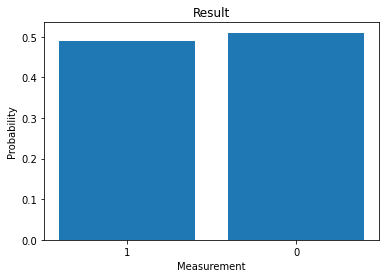

In [7]:
from matplotlib import pyplot

pyplot.bar(result.keys(), result.values())
pyplot.title("Result")
pyplot.xlabel("Measurement")
_ = pyplot.ylabel("Probability")

**See the histogram above? Congratulations, you've submitted a job with Azure Quantum! 👏**


### 5. Next steps
Next, you can try running a program on Rigetti's hardware target. Just replace `RigettiTarget.QVM` with `RigettiTarget.ASPEN_11` or `RigettiTarget.ASPEN_M_1`. Or try another sample by navigating back to the sample gallery. The same "hello world" sample can be run with different quantum providers by choosing another option in the gallery card drop-down menu. Don't worry - your work here is automatically saved.

To learn more about submitting jobs to Azure Quantum using Q#, refer to the [Azure Quantum documentation](https://docs.microsoft.com/azure/quantum/how-to-submit-jobs?pivots=ide-python).

To learn more about job pricing, review [Azure Quantum's pricing documentation](https://docs.microsoft.com/azure/quantum/azure-quantum-job-costs).